In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(246, 168)

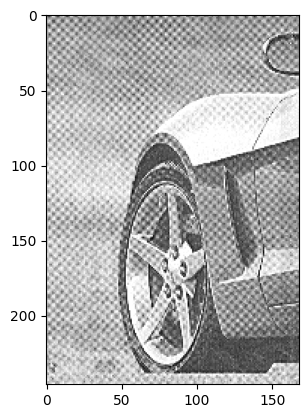

In [16]:
img = cv2.imread("D:\Programming\Computer Vision\Projects\Images\Fig0464(a)(car_75DPI_Moire).tif",cv2.IMREAD_GRAYSCALE)
# img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,"gray")
img.shape

In [24]:
def dft_transform(img, plot_spec = True):
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    mag, phase = cv2.cartToPolar(dft_shift[:,:,0], dft_shift[:,:,1])
    
    spec = 20*np.log(mag)
    
    if plot_spec:
        plt.figure(figsize=(8,8))
        plt.imshow(spec,"gray")
        plt.show()
    
    return dft_shift, spec

Chuyển miền tần số sang miền ảnh

In [18]:
def dft_inverse_transform(dft_shift, plot_image = True):
    mag, phase = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])
    
    real, imag = cv2.polarToCart(mag, phase)
    
    back = cv2.merge([real,imag])
    
    back_ishift = np.fft.ifftshift(back)
    img_back = cv2.idft(back_ishift)
    
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    
    if plot_image:
        plt.imshow(img_back,cmap = "gray")
        plt.imshow
    return img_back

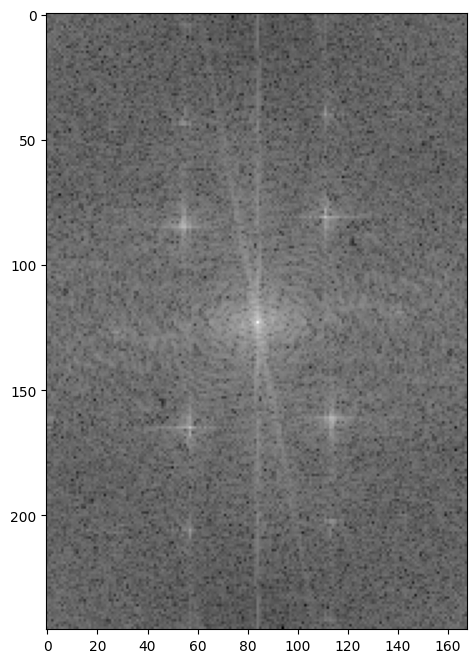

In [25]:
dft_shift, spec = dft_transform(img)

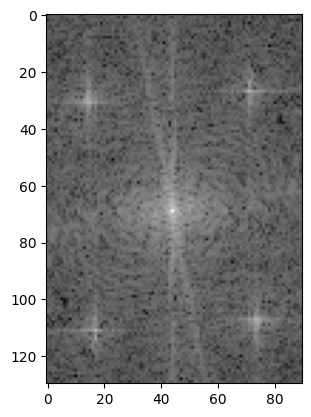

In [49]:
img2 = spec[54:184,40:130]
plt.imshow(img2,'gray')

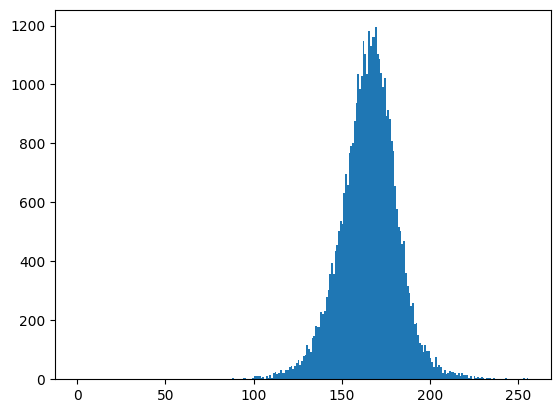

In [50]:
his = plt.hist(spec.ravel(),256,[0,256])

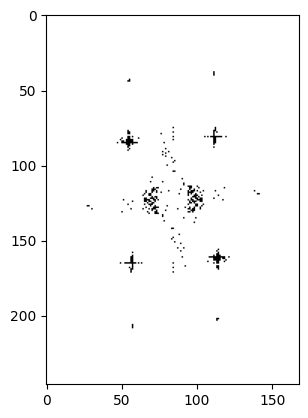

In [85]:
thresh = 200
ret, img3 = cv2.threshold(spec, thresh, 255,cv2.THRESH_BINARY_INV)
plt.imshow(img3,'gray')

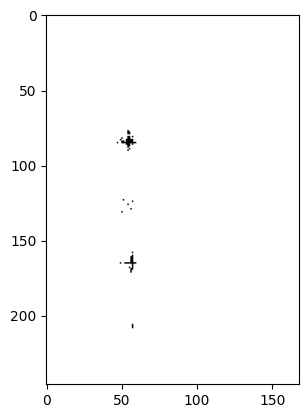

In [98]:
neighborhood = 10
img4 = img3.copy()
img4[50-neighborhood:50+neighborhood,:]=255
img4[:,:50-neighborhood] = 255
img4[:, 50+neighborhood:] = 255
plt.imshow(img4,'gray')
dft_shift_filtered = dft_shift.copy()
for i in range(168):
    for j in range(168):
        if img4[i,j] == 0:
            dft_shift[i,j] = 0

C:\Users\Admin\AppData\Local\Temp\ipykernel_2676\3088046112.py:2: RuntimeWarning: divide by zero encountered in log
  spec = 20* np.log(mag)


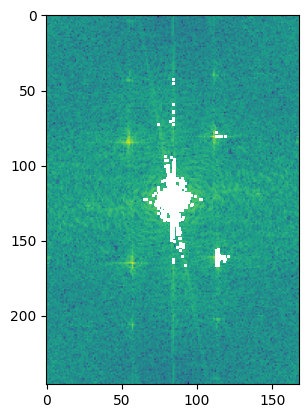

In [99]:
mag, phase = cv2.cartToPolar(dft_shift_filtered[:,:,0], dft_shift_filtered[:,:,1])
spec = 20* np.log(mag)
plt.imshow(spec)

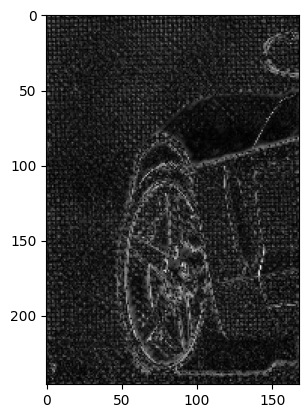

In [100]:
img_back = dft_inverse_transform(dft_shift_filtered)